# Challenge Set 7
---
## Brendon Happ
## Metis Fall 2018 NYC

In [85]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Challenge 1
---

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)



In [2]:
# Load data from site
url="https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df_vote=pd.read_csv(url,
               names = ['f' + str(x) for x in range(1,18)])

In [3]:
for col in df_vote.columns[1:]:
    df_vote[col] = df_vote[col].map({'y':1,'n':0})
    df_vote[col].fillna(df_vote[col].mean(), inplace=True)

In [4]:
df_vote.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 2
---
Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [5]:
X = df_vote.iloc[:,1:]
y = df_vote.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=4444)

### Challenge 3
---
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?



In [6]:
k_acc_list = []
for neighbor in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_acc_list.append((neighbor, accuracy_score(y_test, y_pred)))
    print('Accuracy Score for {0} neighbors: {1:.4f}'.format(neighbor, accuracy_score(y_test, y_pred)))

Accuracy Score for 1 neighbors: 0.9008
Accuracy Score for 2 neighbors: 0.8931
Accuracy Score for 3 neighbors: 0.9008
Accuracy Score for 4 neighbors: 0.9008
Accuracy Score for 5 neighbors: 0.9160
Accuracy Score for 6 neighbors: 0.9313
Accuracy Score for 7 neighbors: 0.9160
Accuracy Score for 8 neighbors: 0.9237
Accuracy Score for 9 neighbors: 0.9313
Accuracy Score for 10 neighbors: 0.9313
Accuracy Score for 11 neighbors: 0.9237
Accuracy Score for 12 neighbors: 0.9237
Accuracy Score for 13 neighbors: 0.9237
Accuracy Score for 14 neighbors: 0.9237
Accuracy Score for 15 neighbors: 0.9237
Accuracy Score for 16 neighbors: 0.9237
Accuracy Score for 17 neighbors: 0.9237
Accuracy Score for 18 neighbors: 0.9160
Accuracy Score for 19 neighbors: 0.9160
Accuracy Score for 20 neighbors: 0.9160


### Challenge 4
---
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Accuracy Score for Logistic Regression: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Accuracy Score for Logistic Regression: 0.9389


### Challenge 5
---
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

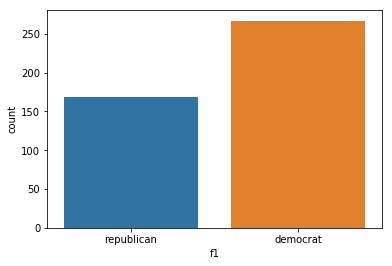

In [8]:
sns.countplot(df_vote.f1);

In [9]:
def democrat_maker(x_array):
    '''
    Takes an array X and returns an array of democrats
    '''
    return ['democrat'] * len(x_array)

In [10]:
def republican_maker(x_array):
    '''
    Takes an array X and returns an array of republicans
    '''
    return ['republican'] * len(x_array)

In [11]:
y_pred_dem = democrat_maker(X_test)
y_pred_rep = republican_maker(X_test)
print('Accuracy Score for Democrat Predictor: {0:.4f}'.format(accuracy_score(y_test, y_pred_dem)))
print('Accuracy Score for Republican Predictor: {0:.4f}'.format(accuracy_score(y_test, y_pred_rep)))

Accuracy Score for Democrat Predictor: 0.5878
Accuracy Score for Republican Predictor: 0.4122


### Challenge 6
---
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



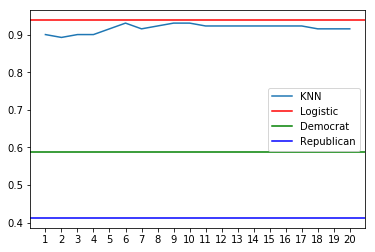

In [12]:
plt.plot(*zip(*k_acc_list), label='KNN')
plt.axhline(y=accuracy_score(y_test, lr_pred), color='r', linestyle='-', label='Logistic')
plt.axhline(y=accuracy_score(y_test, y_pred_dem), color='g', linestyle='-', label='Democrat')
plt.axhline(y=accuracy_score(y_test, y_pred_rep), color='b', linestyle='-', label='Republican')
plt.xticks(np.arange(1,21))
plt.legend();

###Challenge 7
---
Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

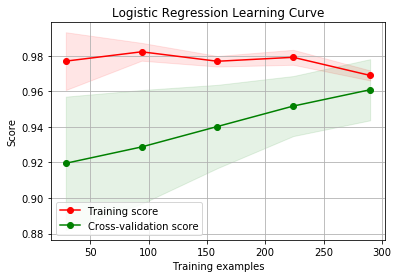

In [14]:
estimator = LogisticRegression()
title = 'Logistic Regression Learning Curve'
plot_learning_curve(estimator, title, X, y);

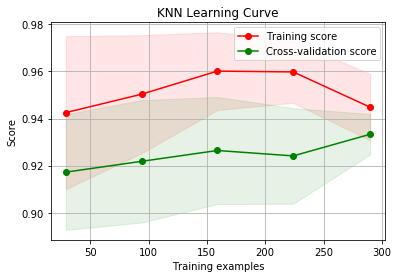

In [15]:
estimator = KNeighborsClassifier(n_neighbors=6)
title = 'KNN Learning Curve'
plot_learning_curve(estimator, title, X, y);

### Challenge 8
---
This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [18]:
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.93893129770992367

In [19]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.95419847328244278

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.93893129770992367

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.96183206106870234

### Challenge 9
---
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [51]:
classifiers = [gb, svc, dtc, rf]
def get_score(classifiers, X, y):
    for classifier in classifiers:
        print(str(classifier).split('(')[0], np.mean(cross_val_score(classifier, X, y)))

In [52]:
get_score(classifiers, X, y)

GaussianNB 0.931034482759
SVC 0.954022988506
DecisionTreeClassifier 0.947126436782
RandomForestClassifier 0.965517241379


### Challenge 10
---
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [159]:
df_vote=pd.read_csv(url,
               names = ['f' + str(x) for x in range(1,18)])
for col in df_vote.columns[1:]:
    df_vote[col] = df_vote[col].map({'y':1,'n':0})
    df_vote[col].fillna(df_vote[col].mode()[0], inplace=True)

In [160]:
df_vote.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [161]:
X = df_vote.iloc[:,2:]
y = df_vote.iloc[:,1]

In [162]:
k_acc_list = []
for neighbor in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    k_acc_list.append((neighbor, accuracy_score(y, y_pred)))
best_k = max(k_acc_list,key=lambda item:item[1])
print('Accuracy Score for {0} neighbors: {1:.4f}'.format(best_k[0], best_k[1]))

Accuracy Score for 1 neighbors: 0.8782


### Challenge 11
---
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [167]:
movie_df = pd.read_csv('2013_movies.csv')
movie_df = movie_df.dropna()
movie_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [168]:
X = movie_df[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movie_df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

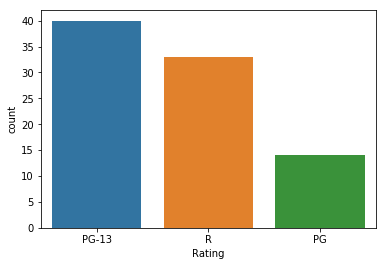

In [169]:
sns.countplot(movie_df.Rating, order=movie_df.Rating.value_counts().index);

In [170]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Accuracy Score for Logistic Regression: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Accuracy Score for Logistic Regression: 0.4444


In [171]:
k_acc_list = []
for neighbor in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_acc_list.append((neighbor, accuracy_score(y_test, y_pred)))
best_k = max(k_acc_list,key=lambda item:item[1])
knn_acc = best_k[1]
print('Accuracy Score for {0} neighbors: {1:.4f}'.format(best_k[0], best_k[1]))

Accuracy Score for 4 neighbors: 0.5556


In [172]:
const = [y.mode()]*len(y_test)
base_acc = accuracy_score(y_test, const)
print('Accuracy Score for Logistic Regression Baseline: {0:.4f}'.format(accuracy_score(y_test, const)))

Accuracy Score for Logistic Regression Baseline: 0.4074


In [177]:
print('Logistic is {0:.0f}% better than baseline'.format((lr_acc-base_acc)/base_acc*100))
print('KNN is {0:.0f}% better than baseline'.format((knn_acc-base_acc)/base_acc*100))

Logistic is 9% better than baseline
KNN is 36% better than baseline


In [178]:
lr.coef_

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

Best features is Budget, then Total Gross, then runtime

### Challenge 12
---
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?

What is the most recent year of surgery?

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case.

In [204]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
hab_df=pd.read_csv(url,
               names = ['f1', 'f2', 'f3', 't'])

In [205]:
hab_df.head()

,f1,f2,f3,t
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [206]:
print('Average Age:{}'.format(hab_df.f1.mean()))
print('Standard Dev of Age: {}'.format(hab_df.f1.std()))

Average Age:52.45751633986928
Standard Dev of Age: 10.80345234930328


In [207]:
print('Average Age survived 5 years or longer:{}'.format(hab_df[hab_df.t==1].f1.mean()))
print('Standard Dev of Age survived 5 years or longer: {}'.format(hab_df[hab_df.t==1].f1.std()))

Average Age survived 5 years or longer:52.01777777777778
Standard Dev of Age survived 5 years or longer: 11.012154179929546


In [209]:
print('Average Age survived less than 5 years:{}'.format(hab_df[hab_df.t==2].f1.mean()))
print('Standard Dev of Age survived less than 5 years: {}'.format(hab_df[hab_df.t==2].f1.std()))

Average Age survived less than 5 years:53.67901234567901
Standard Dev of Age survived less than 5 years: 10.16713720829741


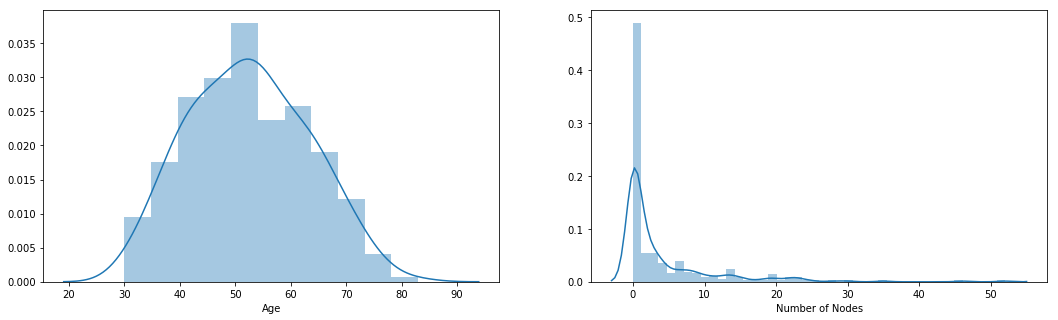

In [225]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.distplot(hab_df.f1, ax=ax1)
ax1.set_xlabel('Age')
sns.distplot(hab_df.f3, ax=ax2)
ax2.set_xlabel('Number of Nodes');

In [228]:
print('Most Recent Surgery:{}'.format(1900 + hab_df.f2.max()))
print('Earliest Surgery:{}'.format(1900 + hab_df.f2.min()))

Most Recent Surgery:1969
Earliest Surgery:1958


In [232]:
X = hab_df.iloc[:,:3]
y = hab_df.iloc[:,3]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=4444)

In [234]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print('Accuracy Score for Logistic Regression: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Accuracy Score for Logistic Regression: 0.8152


In [235]:
lr.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

Order of importance of features: Nodes -> Age -> Operation year

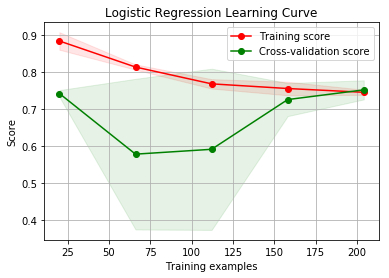

In [236]:
estimator = LogisticRegression()
title = 'Logistic Regression Learning Curve'
plot_learning_curve(estimator, title, X, y);